<a href="https://colab.research.google.com/github/Uma9894/Hand-Written-Digit-Recognization/blob/main/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (if not already installed)
!pip install tensorflow numpy matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
import os

# Mount Google Drive (optional, if dataset is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Load and Preprocess Data
# Assuming dataset is in '/content/drive/My Drive/dataset/'
dataset_path = '/content/drive/MyDrive/digit dataset/datasets/'


In [ ]:
# Image settings
img_size = (32, 32)  # Resize images
batch_size = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,    # Normalize
    validation_split=0.2  # 20% for validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

Found 4026 images belonging to 10 classes.
Found 1004 images belonging to 10 classes.


In [ ]:
# Step 3: Load DenseNet Model
base_model = DenseNet121(weights=None, include_top=False, input_shape=(32, 32, 1))


In [ ]:
# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)  # 10 classes (0-9 digits)

model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 4: Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 1947s 15s/step - accuracy: 0.0926 - loss: 2.3028 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 90s 715ms/step - accuracy: 0.0998 - loss: 2.3027 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 92s 731ms/step - accuracy: 0.0973 - loss: 2.3026 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 87s 690ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 91s 721ms/step - accuracy: 0.1024 - loss: 2.3026 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 87s 690ms/step - accuracy: 0.1011 - loss: 2.3028 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 144s 707ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.1016 - val_loss: 2.3026
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 93s 736ms/step - accuracy: 0.1017 - loss: 

In [ ]:
# Step 5: Evaluate on Validation Set
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.0955 - loss: 2.3025
Validation Accuracy: 0.1016


In [ ]:
Training Accuracy:
0.0906
×
100
=
9.06
%
0.0906×100=9.06%

Validation Accuracy:
0.1016
×
100
=
10.16
%
0.1016×100=10.16%

So, the accuracy values in percentage form are:
Training Accuracy: 9.06%
Validation Accuracy: 10.16%

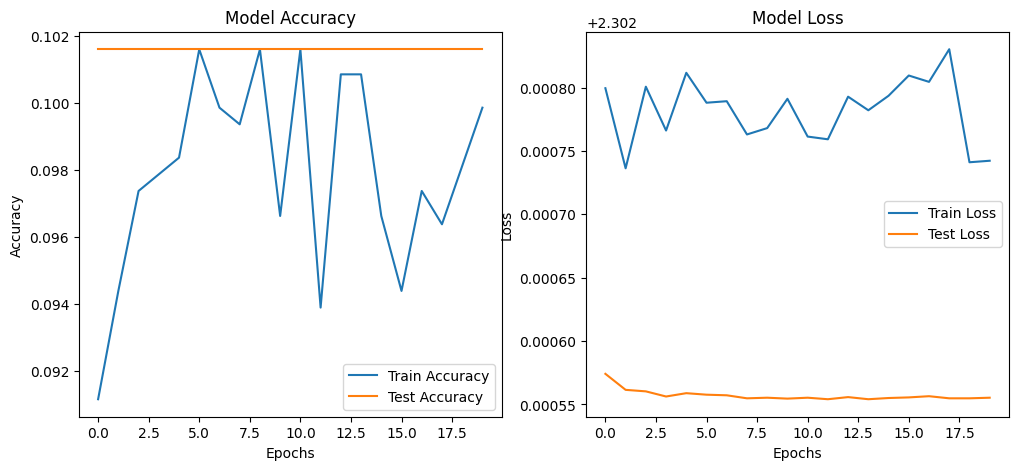

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
# Step 6: Save Model
model.save("/content/drive/My Drive/digit_recognition_densenet.h5")


In [ ]:
import cv2
import numpy as np

def predict_digit(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load single image
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return None  # Skip if image is not found

    img = cv2.resize(img, (32, 32))  # Resize to model input size
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=[0, -1])  # Reshape to (1, 32, 32, 1)

    prediction = model.predict(img)  # Predict the digit
    return np.argmax(prediction)  # Return predicted class


In [ ]:
test_images = [
    "/content/drive/My Drive/digit dataset/datasets/0/0.png",
    "/content/drive/My Drive/digit dataset/datasets/0/1.png",
    "/content/drive/My Drive/digit dataset/datasets/0/2.png",
    "/content/drive/My Drive/digit dataset/datasets/0/3.png",
    "/content/drive/My Drive/digit dataset/datasets/0/4.png"
]

In [ ]:
# Correct way to predict multiple images
predicted_classes = [predict_digit(img) for img in test_images]

print(f"Predicted Digits: {predicted_classes}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Digits: [np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3)]
